# ***Natural Language Processing Assignment-1 Solution***

## ***Basic Level***

In [22]:
# Text Dataset taken for Assignment
import pandas as pd
df = pd.read_csv("IMDB_Dataset.csv")
print(df.head())

corpus = df['review'].values
labels = df['sentiment'].values
print("Number of reviews:", len(corpus))
print(corpus)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Number of reviews: 50000
["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mai

### ***Text pre-processing for Natural Language Processing***

##### ***1. Lowercasing***

In [23]:
for i in range(0, len(corpus)):
    corpus[i] = corpus[i].lower()
corpus_lower = []
for review in df['review']:
    corpus_lower.append(review.lower())
df['lowercase'] = corpus_lower
print(df['lowercase'].head())
print(corpus)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: lowercase, dtype: object
["one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts 

##### ***2. Removing Puncuations and Special Characters***

In [24]:
import re
corpus_cleaned = []
for review in df['lowercase']:
    review_clean = re.sub(r'[^\w\s]', '', review)
    corpus_cleaned.append(review_clean)
df['cleaned'] = corpus_cleaned
print(df['cleaned'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: cleaned, dtype: object


##### ***3. Tokenization***

In [25]:
from nltk.tokenize import word_tokenize
corpus_tokens = []
for review in df['cleaned']:
    tokens = word_tokenize(review)
    corpus_tokens.append(tokens)
df['tokens'] = corpus_tokens
print(df['tokens'].head())

0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production, br, br, the...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, theres, a, family, where, a, littl...
4    [petter, matteis, love, in, the, time, of, mon...
Name: tokens, dtype: object


##### ***4. Removal of Stopwords and tokenizing them***

In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
corpus_no_stopwords = []
for tokens in df['tokens']:
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    corpus_no_stopwords.append(filtered_tokens)
df['tokens_no_stopwords'] = corpus_no_stopwords
print(df['tokens_no_stopwords'].head())

0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: tokens_no_stopwords, dtype: object


##### ***5. Removing the URLs***

In [27]:
corpus_no_urls = []
for review in df['lowercase']:
    review_no_url = re.sub(r'https?://\S+|www\.\S+', '', review)
    corpus_no_urls.append(review_no_url)
df['no_urls'] = corpus_no_urls
print(df['no_urls'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: no_urls, dtype: object


##### ***6. Removing HTML Tags***

In [28]:
corpus_no_html = []
for review in df['no_urls']:
    review_no_html = re.sub(r'<.*?>', '', review)
    corpus_no_html.append(review_no_html)
df['no_html'] = corpus_no_html
print(df['no_html'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: no_html, dtype: object


##### ***7. Stemming***

In [29]:
# Performing stemming on the tokenized words with no stopwords

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
corpus_stemmed = []
for tokens in df['tokens_no_stopwords']:
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    corpus_stemmed.append(stemmed_tokens)
df['stemmed'] = corpus_stemmed
print(df['stemmed'].head())

0    [one, review, mention, watch, oz, episod, youl...
1    [wonder, littl, product, br, br, film, techniq...
2    [thought, wonder, way, spend, time, hot, summe...
3    [basic, there, famili, littl, boy, jake, think...
4    [petter, mattei, love, time, money, visual, st...
Name: stemmed, dtype: object


##### ***8. Lemmatization***

In [30]:
# Performing lemmatization on the tokenized words with no stopwords

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus_lemmatized = []
for tokens in df['tokens_no_stopwords']:
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    corpus_lemmatized.append(lemmatized_tokens)
df['lemmatized'] = corpus_lemmatized
print(df['lemmatized'].head())

0    [one, reviewer, mentioned, watching, oz, episo...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, family, little, boy, jake, ...
4    [petter, matteis, love, time, money, visually,...
Name: lemmatized, dtype: object


### ***Text Processing for Natural Language Processing***

##### ***1. Bag of Words***

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
corpus_for_bow = []
for tokens in df['tokens_no_stopwords']:
    corpus_for_bow.append(' '.join(tokens))

vectorizer = CountVectorizer(max_features=5000)  # top 5000 words
X = vectorizer.fit_transform(corpus_for_bow)
feature_names = vectorizer.get_feature_names_out()

print("Number of unique words used:", len(feature_names))
print("Bag of Words Matrix shape:", X.shape)

bow_df = pd.DataFrame.sparse.from_spmatrix(X, columns=feature_names)
print(bow_df.head())


Number of unique words used: 5000
Bag of Words Matrix shape: (50000, 5000)
   aaron  abandoned  abc  abilities  ability  able  aboutbr  absence  absent  \
0      0          0    0          0        0     0        0        0       0   
1      0          0    0          0        0     0        0        0       0   
2      0          0    0          0        0     0        0        0       0   
3      0          0    0          0        0     0        0        0       0   
4      0          0    0          0        0     0        0        0       0   

   absolute  ...  youll  young  younger  youre  youth  youve  zero  zombie  \
0         0  ...      1      0        0      0      0      0     0       0   
1         0  ...      0      0        0      0      0      0     0       0   
2         0  ...      0      1        0      0      0      0     0       0   
3         0  ...      0      0        0      1      0      0     0       1   
4         0  ...      0      0        0      0      0 

##### ***2. Term Frequency - Inverse Document Frequency (TF-IDF)***

   aaron  abandoned  abc  abilities  ability  able  aboutbr  absence  absent  \
0      0          0    0          0        0     0        0        0       0   
1      0          0    0          0        0     0        0        0       0   
2      0          0    0          0        0     0        0        0       0   
3      0          0    0          0        0     0        0        0       0   
4      0          0    0          0        0     0        0        0       0   

   absolute  ...     youll     young  younger     youre  youth  youve  zero  \
0         0  ...  0.059976         0        0         0      0      0     0   
1         0  ...         0         0        0         0      0      0     0   
2         0  ...         0  0.080242        0         0      0      0     0   
3         0  ...         0         0        0  0.079252      0      0     0   
4         0  ...         0         0        0         0      0      0     0   

     zombie  zombies  zone  
0         0    

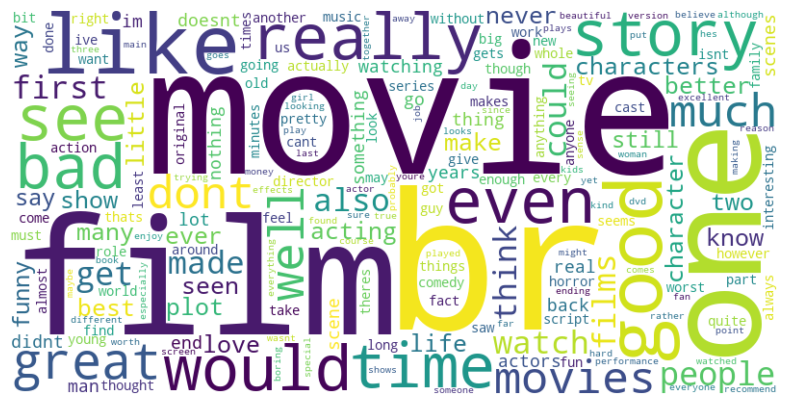

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus_for_tfidf = []
for tokens in df['tokens_no_stopwords']:
    corpus_for_tfidf.append(' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # limit vocab to top 5000 terms
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_for_tfidf)
terms = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=terms)
print(tfidf_df.head())

import numpy as np
tfidf_sum = np.asarray(tfidf_matrix.sum(axis=0)).flatten() 
tfidf_dict = dict(zip(terms, tfidf_sum))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## ***Advanced Level***

##### ***1. Encodings***

In [36]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

all_words = [word for tokens in df['tokens_no_stopwords'] for word in tokens]
vocab = sorted(set(all_words))
print("Vocabulary Size:", len(vocab))
word_array = np.array(all_words).reshape(-1, 1)
one_hot_encoder = OneHotEncoder(sparse_output=True)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)
print("One-hot encoded matrix:\n", one_hot_encoded)

Vocabulary Size: 175324
One-hot encoded matrix:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6067730 stored elements and shape (6067730, 175324)>
  Coords	Values
  (0, 109357)	1.0
  (1, 128862)	1.0
  (2, 96362)	1.0
  (3, 168231)	1.0
  (4, 112137)	1.0
  (5, 48720)	1.0
  (6, 174159)	1.0
  (7, 71804)	1.0
  (8, 129509)	1.0
  (9, 50190)	1.0
  (10, 67300)	1.0
  (11, 95531)	1.0
  (12, 18309)	1.0
  (13, 55382)	1.0
  (14, 155104)	1.0
  (15, 148565)	1.0
  (16, 112137)	1.0
  (17, 19799)	1.0
  (18, 162637)	1.0
  (19, 134142)	1.0
  (20, 166370)	1.0
  (21, 137501)	1.0
  (22, 129509)	1.0
  (23, 172082)	1.0
  (24, 62565)	1.0
  :	:
  (6067705, 18309)	1.0
  (6067706, 172536)	1.0
  (6067707, 133671)	1.0
  (6067708, 100969)	1.0
  (6067709, 172500)	1.0
  (6067710, 127647)	1.0
  (6067711, 67511)	1.0
  (6067712, 172500)	1.0
  (6067713, 168231)	1.0
  (6067714, 72737)	1.0
  (6067715, 159828)	1.0
  (6067716, 52402)	1.0
  (6067717, 104102)	1.0
  (6067718, 135895)	1.0
  (6067719, 101248)	1.0
  (

##### ***2. Word Embeddings and Word2Vec***

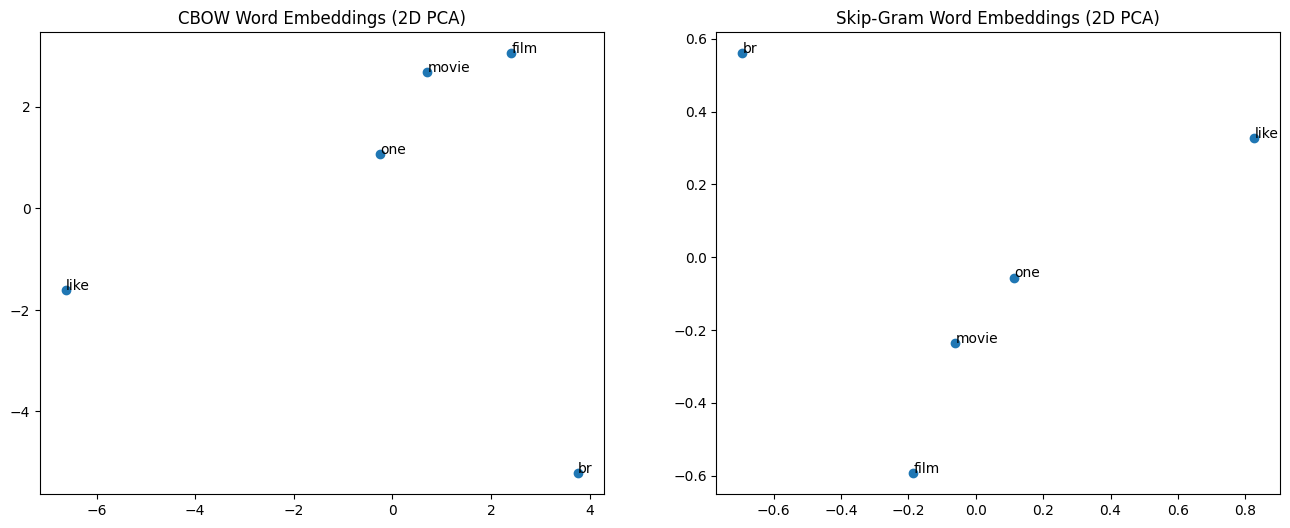

Similarity between 'br' and 'movie' (CBOW): 0.4264
Similarity between 'br' and 'movie' (Skip-Gram): 0.7816


In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from collections import Counter

tokenized_corpus = df['tokens_no_stopwords'].tolist()

cbow_model = Word2Vec(sentences=tokenized_corpus, vector_size=20, window=5, min_count=5, sg=0, epochs=10)
skipgram_model = Word2Vec(sentences=tokenized_corpus, vector_size=20, window=5, min_count=5, sg=1, epochs=10)

all_words = [word for tokens in tokenized_corpus for word in tokens]
word_counts = Counter(all_words)
top_words = [word for word, freq in word_counts.most_common(5)] 

top_words_cbow = [word for word in top_words if word in cbow_model.wv]
top_words_skip = [word for word in top_words if word in skipgram_model.wv]

vectors_cbow = [cbow_model.wv[word] for word in top_words_cbow]
vectors_skip = [skipgram_model.wv[word] for word in top_words_skip]

pca = PCA(n_components=2)
vectors_cbow_2d = pca.fit_transform(vectors_cbow)
vectors_skip_2d = pca.fit_transform(vectors_skip)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].scatter(vectors_cbow_2d[:,0], vectors_cbow_2d[:,1])
for i, word in enumerate(top_words_cbow):
    axes[0].text(vectors_cbow_2d[i,0]+0.002, vectors_cbow_2d[i,1]+0.002, word)
axes[0].set_title("CBOW Word Embeddings (2D PCA)")

axes[1].scatter(vectors_skip_2d[:,0], vectors_skip_2d[:,1])
for i, word in enumerate(top_words_skip):
    axes[1].text(vectors_skip_2d[i,0]+0.002, vectors_skip_2d[i,1]+0.002, word)
axes[1].set_title("Skip-Gram Word Embeddings (2D PCA)")

plt.show()

if len(top_words_cbow) >= 2:
    sim_cbow = cbow_model.wv.similarity(top_words_cbow[0], top_words_cbow[1])
    sim_skip = skipgram_model.wv.similarity(top_words_skip[0], top_words_skip[1])
    print(f"Similarity between '{top_words_cbow[0]}' and '{top_words_cbow[1]}' (CBOW): {sim_cbow:.4f}")
    print(f"Similarity between '{top_words_skip[0]}' and '{top_words_skip[1]}' (Skip-Gram): {sim_skip:.4f}")
